# Демонстрация генерации сигналов в TensorAeroSpace

## Цель

Данный пример демонстрирует возможности библиотеки TensorAeroSpace для генерации различных типов сигналов, используемых в задачах управления летательными аппаратами. Мы рассмотрим три основных типа сигналов:

1. **Ступенчатый сигнал** - для анализа переходных процессов
2. **Синусоидальный сигнал** - для частотного анализа системы
3. **Случайный сигнал** - для моделирования возмущений и шума

## Описание

Генерация сигналов является важной частью процесса моделирования и тестирования систем управления. Различные типы сигналов позволяют:

- Анализировать динамические характеристики системы
- Тестировать робастность алгоритмов управления
- Моделировать реальные условия эксплуатации
- Проводить частотный анализ


In [9]:
# Импорт необходимых библиотек
import tensoraerospace.utils as utils
from tensoraerospace.signals.standart import unit_step, sinusoid
from tensoraerospace.signals.random import full_random_signal
import matplotlib.pyplot as plt
import numpy as np

# Настройка параметров визуализации
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Настройка параметров симуляции

Определим основные параметры для генерации сигналов:

In [10]:
# Параметры времени
dt = 0.01  # Шаг дискретизации (сек)
tn = 0     # Начальное время (сек) - не используется в generate_time_period
tp = 20    # Конечное время (сек)

# Генерация временного массива
tps = utils.generate_time_period(tp, dt)  # Используем tp вместо tn как первый параметр
tps_sec = utils.convert_tp_to_sec_tp(tps, dt)  # Правильное название функции

print(f'Параметры симуляции:')
print(f'Шаг дискретизации: {dt} сек')
print(f'Период симуляции: 0 - {tp} сек')
print(f'Количество точек: {len(tps)}')

Параметры симуляции:
Шаг дискретизации: 0.01 сек
Период симуляции: 0 - 20 сек
Количество точек: 2002


## 1. Ступенчатый сигнал

Ступенчатый сигнал используется для анализа переходных процессов в системах управления. Он позволяет оценить время установления, перерегулирование и другие динамические характеристики.

### Параметры ступенчатого сигнала:

| Параметр | Значение | Единицы | Описание |
|----------|----------|---------|----------|
| degree | 1.0 | рад | Амплитуда ступенчатого сигнала |
| time_step | 5.0 | сек | Время начала ступенчатого воздействия |
| output_rad | True | - | Выходной сигнал в радианах |

In [13]:
# Параметры ступенчатого сигнала
degree = 1.0      # Амплитуда (рад)
time_step = 5.0   # Время начала ступени (сек)
output_rad = True # Выход в радианах

# Генерация ступенчатого сигнала
step_signal = unit_step(tps, degree, time_step, dt, output_rad)

print('Генерация ступенчатого сигнала завершена')
print(f'Амплитуда: {degree} рад')
print(f'Время начала ступени: {time_step} сек')
print(f'Длина сигнала: {len(step_signal)} точек')

Генерация ступенчатого сигнала завершена
Амплитуда: 1.0 рад
Время начала ступени: 5.0 сек
Длина сигнала: 2002 точек


## 2. Синусоидальный сигнал

Синусоидальный сигнал применяется для частотного анализа систем управления. Он позволяет исследовать амплитудно-частотные и фазо-частотные характеристики системы.

### Параметры синусоидального сигнала:

| Параметр | Значение | Единицы | Описание |
|----------|----------|---------|----------|
| amplitude | 0.5 | рад | Амплитуда синусоидального сигнала |
| frequency | 0.2 | Гц | Частота синусоидального сигнала |
| period | 5.0 | сек | Период синусоидального сигнала |

### Визуализация ступенчатого сигнала

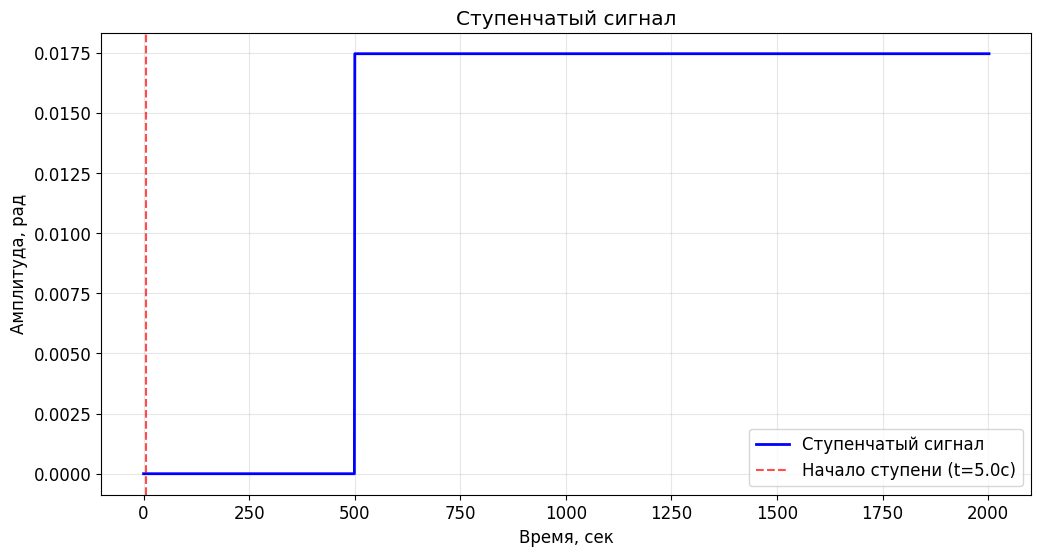

In [14]:
# Построение графика ступенчатого сигнала
plt.figure(figsize=(12, 6))
plt.plot(tps, step_signal, 'b-', linewidth=2, label='Ступенчатый сигнал')
plt.axvline(x=time_step, color='r', linestyle='--', alpha=0.7, label=f'Начало ступени (t={time_step}с)')
plt.xlabel('Время, сек')
plt.ylabel('Амплитуда, рад')
plt.title('Ступенчатый сигнал')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Синусоидальный сигнал

Синусоидальный сигнал применяется для частотного анализа систем управления. Он позволяет исследовать амплитудно-частотные и фазо-частотные характеристики системы.

### Параметры синусоидального сигнала:

| Параметр | Значение | Единицы | Описание |
|----------|----------|---------|----------|
| amplitude | 0.5 | рад | Амплитуда синусоидального сигнала |
| frequency | 0.2 | Гц | Частота синусоидального сигнала |
| period | 5.0 | сек | Период синусоидального сигнала |

In [17]:
# Параметры синусоидального сигнала
amplitude = 0.5  # Амплитуда (рад)
frequency = 0.2  # Частота (Гц)
period = 1/frequency  # Период (сек)

# Генерация синусоидального сигнала
sin_signal =  sinusoid(tps, frequency, amplitude)

print('Генерация синусоидального сигнала завершена')
print(f'Амплитуда: {amplitude} рад')
print(f'Частота: {frequency} Гц')
print(f'Период: {period} сек')
print(f'Длина сигнала: {len(sin_signal)} точек')

Генерация синусоидального сигнала завершена
Амплитуда: 0.5 рад
Частота: 0.2 Гц
Период: 5.0 сек
Длина сигнала: 2002 точек


### Визуализация синусоидального сигнала

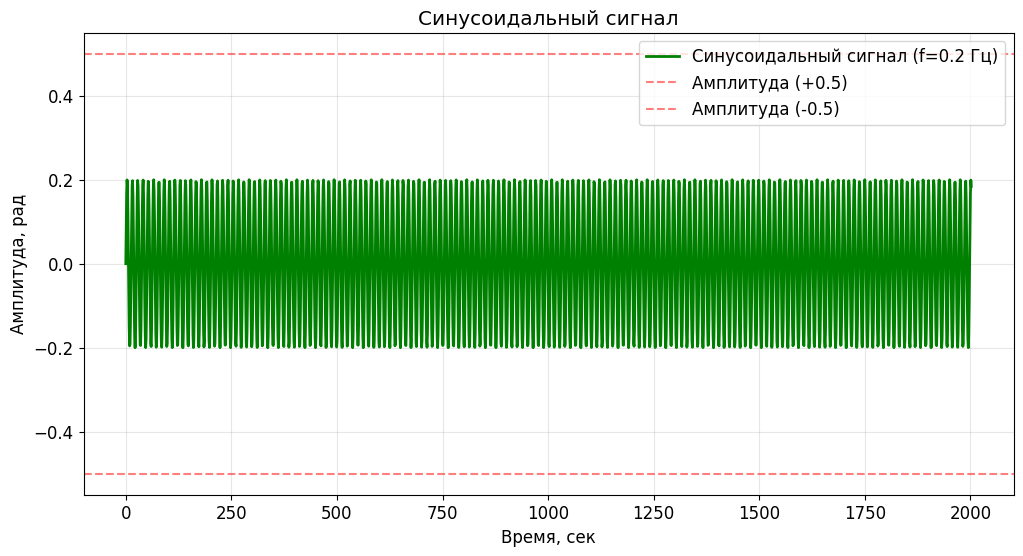

In [18]:
# Построение графика синусоидального сигнала
plt.figure(figsize=(12, 6))
plt.plot(tps, sin_signal, 'g-', linewidth=2, label=f'Синусоидальный сигнал (f={frequency} Гц)')
plt.axhline(y=amplitude, color='r', linestyle='--', alpha=0.5, label=f'Амплитуда (+{amplitude})')
plt.axhline(y=-amplitude, color='r', linestyle='--', alpha=0.5, label=f'Амплитуда (-{amplitude})')
plt.xlabel('Время, сек')
plt.ylabel('Амплитуда, рад')
plt.title('Синусоидальный сигнал')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Случайный сигнал

Случайный сигнал используется для моделирования атмосферных возмущений, шума датчиков и тестирования робастности системы управления.

### Параметры случайного сигнала:

| Параметр | Значение | Единицы | Описание |
|----------|----------|---------|----------|
| start_time | 0 | сек | Время начала генерации |
| duration | 20 | сек | Длительность сигнала |
| range_1 | (-0.5, 0.5) | - | Диапазон первого компонента |
| range_2 | (-0.5, 0.5) | - | Диапазон второго компонента |

In [19]:
# Параметры случайного сигнала
start_time = 0
duration = 20
range_1 = (-0.5, 0.5)
range_2 = (-0.5, 0.5)

# Генерация случайного сигнала
random_signal = full_random_signal(start_time, dt, duration, range_1, range_2)

# Статистический анализ
mean_val = np.mean(random_signal)
std_val = np.std(random_signal)
min_val = np.min(random_signal)
max_val = np.max(random_signal)

print('Генерация случайного сигнала завершена')
print(f'Длительность: {duration} сек')
print(f'Количество точек: {len(random_signal)}')
print(f'Диапазон значений: {range_1}')
print(f'Среднее значение: {mean_val:.4f}')
print(f'Стандартное отклонение: {std_val:.4f}')
print(f'Минимальное значение: {min_val:.4f}')
print(f'Максимальное значение: {max_val:.4f}')

Генерация случайного сигнала завершена
Длительность: 20 сек
Количество точек: 2001
Диапазон значений: (-0.5, 0.5)
Среднее значение: 0.0292
Стандартное отклонение: 0.2894
Минимальное значение: -0.4850
Максимальное значение: 0.4962


### Визуализация случайного сигнала

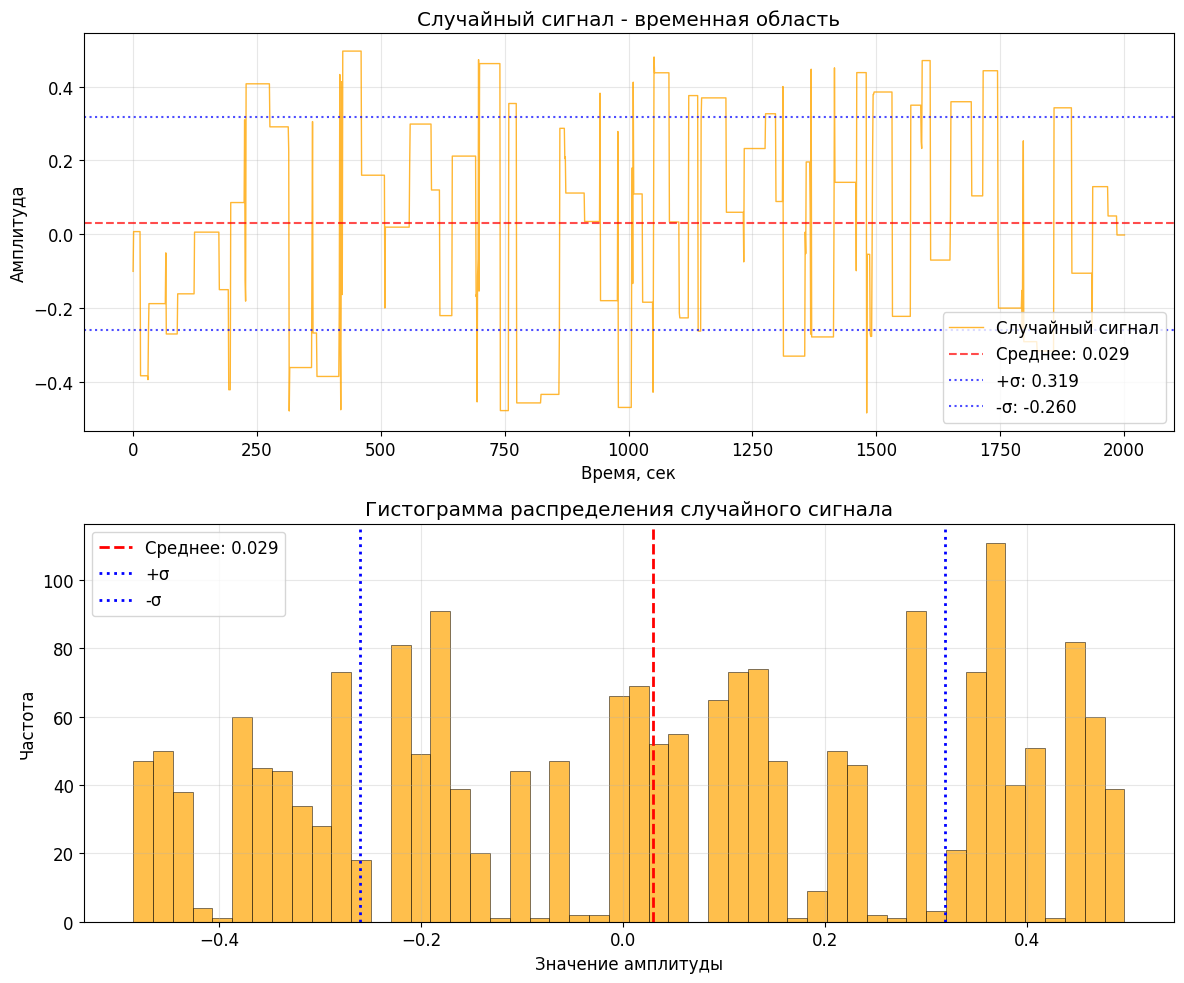

In [20]:
# Построение графиков случайного сигнала
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# График временной области
ax1.plot(tps[:2001], random_signal, 'orange', linewidth=1, alpha=0.8, label='Случайный сигнал')
ax1.axhline(y=mean_val, color='red', linestyle='--', alpha=0.7, label=f'Среднее: {mean_val:.3f}')
ax1.axhline(y=mean_val + std_val, color='blue', linestyle=':', alpha=0.7, label=f'+σ: {mean_val + std_val:.3f}')
ax1.axhline(y=mean_val - std_val, color='blue', linestyle=':', alpha=0.7, label=f'-σ: {mean_val - std_val:.3f}')
ax1.set_xlabel('Время, сек')
ax1.set_ylabel('Амплитуда')
ax1.set_title('Случайный сигнал - временная область')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Гистограмма распределения
ax2.hist(random_signal, bins=50, color='orange', alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvline(x=mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.3f}')
ax2.axvline(x=mean_val + std_val, color='blue', linestyle=':', linewidth=2, label='+σ')
ax2.axvline(x=mean_val - std_val, color='blue', linestyle=':', linewidth=2, label='-σ')
ax2.set_xlabel('Значение амплитуды')
ax2.set_ylabel('Частота')
ax2.set_title('Гистограмма распределения случайного сигнала')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Результаты

В данном примере мы успешно продемонстрировали генерацию трех основных типов сигналов с помощью библиотеки TensorAeroSpace:

### Созданные сигналы:

1. **Ступенчатый сигнал** - используется для анализа переходных процессов в системах управления
2. **Синусоидальный сигнал** - применяется для частотного анализа и исследования динамических характеристик
3. **Случайный сигнал** - моделирует возмущения и шум в реальных условиях эксплуатации

### Практическое применение:

- **Анализ систем управления**: Каждый тип сигнала позволяет исследовать различные аспекты поведения системы
- **Тестирование алгоритмов**: Сигналы используются для проверки робастности и эффективности алгоритмов управления
- **Моделирование реальных условий**: Случайные сигналы помогают имитировать атмосферные возмущения и шум датчиков

### Возможности для развития:

- Комбинирование различных типов сигналов для создания более сложных тестовых сценариев
- Анализ спектральных характеристик сгенерированных сигналов
- Применение фильтрации и цифровой обработки сигналов
- Интеграция с системами управления для замкнутого контура

---

**Поздравляем! Вы успешно освоили основы генерации сигналов в TensorAeroSpace!**